In [1]:
# Import Dataset loader 
using MLDatasets
using Plots

# NNJulia
include("../src/NNJulia.jl")
using .NNJulia

In [2]:
####
# if this cell throws an error, copy these lines in
# julia REPL to download the data a first time, it will work here right after
####
# load full training set
train_x, train_y = MNIST.traindata();

# load full test set
test_x,  test_y  = MNIST.testdata();

In [3]:
# one-hot encoding of the labels
train_y_hot = to_one_hot(train_y)
test_y_hot = to_one_hot(test_y);

In [4]:
model = Sequential(
        Flatten(),
        Dense(784, 16, relu),
        Dense(16, 16, relu),
        Dense(16, 10, softmax),
    )

Sequential with : 4 layer


Flatten layer.
Dense: 784 --> 16, Activation = relu
Dense: 16 --> 16, Activation = relu
Dense: 16 --> 10, Activation = softmax


In [5]:
# Initialise the optimiser, the loss function and the metrics used to compute accuracy
opt = GradientDescent(0.05)
loss = BinaryCrossentropy() # FIXME: Does not work with categorical crossentropy yet
metrics = CategoricalAccuracy()

# Pass it to the TrainParameters struct that will be used during training
trainParams = TrainParameters(opt, loss, metrics)

# Training specifications
batchsize = 64
nbEpochs = 25;

In [6]:
trainData = DataLoader(train_x, train_y_hot, batchsize,true);

In [7]:
# The prints does not work during training in the notebook. (use the .jl version to see the lines printed during trianing )
history = train!(model, trainParams, trainData, nbEpochs,true)

Epoch 1 : accuracy = 0.2113372867803838, loss = 361.1432236409624
Epoch 2 : accuracy = 0.31399920042643925, loss = 268.10120445666155
Epoch 3 : accuracy = 0.4025019989339019, loss = 239.94815440035595
Epoch 4 : accuracy = 0.47612939765458423, loss = 214.90913923129725
Epoch 5 : accuracy = 0.5312166844349681, loss = 195.88767844476166
Epoch 6 : accuracy = 0.5782082889125799, loss = 181.2566546541227
Epoch 7 : accuracy = 0.6159881396588486, loss = 168.6547423803585
Epoch 8 : accuracy = 0.6452891791044776, loss = 157.6402818729847
Epoch 9 : accuracy = 0.6719083155650319, loss = 148.0343447596389
Epoch 10 : accuracy = 0.6915644989339019, loss = 139.83647848481937
Epoch 11 : accuracy = 0.7081389925373134, loss = 133.08041200217133
Epoch 12 : accuracy = 0.7220648987206824, loss = 127.15497583954847
Epoch 13 : accuracy = 0.7354744136460555, loss = 121.98386324457813
Epoch 14 : accuracy = 0.7472514658848614, loss = 117.29796631467512
Epoch 15 : accuracy = 0.7566631130063965, loss = 113.1398619

Dict{String, Vector{Float64}} with 2 entries:
  "accuracy" => [0.211337, 0.313999, 0.402502, 0.476129, 0.531217, 0.578208, 0.…
  "loss"     => [361.143, 268.101, 239.948, 214.909, 195.888, 181.257, 168.655,…

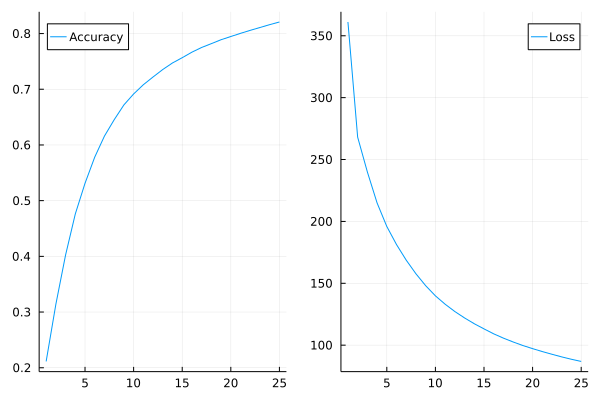

In [8]:
p1 = plot(history["accuracy"],label="Accuracy",legend=:topleft)
p2 = plot(history["loss"],label="Loss")
plot(p1,p2,layout=2)

In [9]:
acc = evaluate(model,metrics,test_x,test_y_hot)
println("accuracy on test data = " * string(acc*100) * "%")

accuracy on test data = 83.8%


In [26]:
using Images

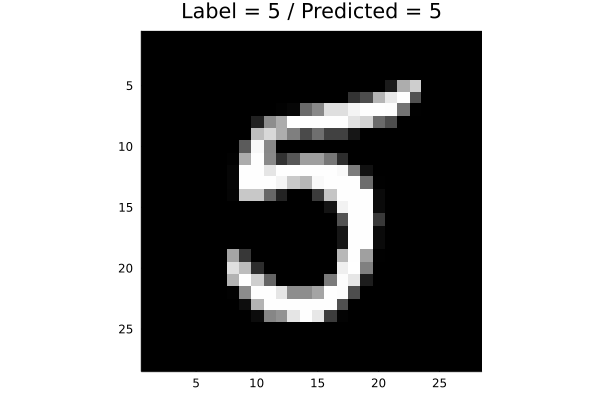

In [127]:
r = rand(1:10000)
img = (Gray.(permutedims(test_x[:,:,r])))
label = test_y[r]
preds = model(reshape(test_x[:,:,r],:,1));
predicted_label = argmax(preds.data)[1]-1
plot(img,title="Label = " * string(label) * " / Predicted = " * string(predicted_label))
